# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint

In [2]:
import dendrotweaks as dd

In [3]:
# morphology
dd.morphology.Node
dd.morphology.Tree
dd.morphology.Point
dd.morphology.PointTree
dd.morphology.Section
dd.morphology.Domain
dd.morphology.SectionTree
dd.morphology.Segment
dd.morphology.SegmentTree

dendrotweaks.morphology.seg_trees.SegmentTree

In [4]:
# membrane
dd.membrane.Mechanism
dd.membrane.SectionGroup
dd.membrane.SegmentGroup
dd.membrane.Distribution

dendrotweaks.membrane.distributions.Distribution

In [5]:
# stimuli
dd.stimuli.IClamp
dd.stimuli.Synapse
dd.stimuli.Population

dendrotweaks.stimuli.populations.Population

In [6]:
dd.Model
dd.NEURONSimulator

dendrotweaks.simulators.NEURONSimulator

# Create a Model

In [7]:
import os
cwd = os.getcwd()
path_to_data = os.path.join(cwd, 'data')

In [8]:
model = dd.Model(name='Park_2019', 
                 path_to_data=path_to_data)

## Load morphology from SWC

In [9]:
model.print_directory_tree()

├── membrane
│   └── Park_2019_test.json
├── mod
│   ├── CaHVA
│   │   ├── CaHVA.mod
│   │   └── x86_64
│   ├── CaHVA.mod
│   ├── CaLVA
│   │   ├── CaLVA.mod
│   │   └── x86_64
│   ├── CaLVA.mod
│   ├── KCa
│   │   ├── KCa.mod
│   │   └── x86_64
│   ├── KCa.mod
│   ├── Ka
│   │   ├── Ka.mod
│   │   └── x86_64
│   ├── Ka.mod
│   ├── Km
│   │   ├── Km.mod
│   │   └── x86_64
│   ├── Km.mod
│   ├── Kv
│   │   ├── Kv.mod
│   │   └── x86_64
│   ├── Kv.mod
│   ├── Na
│   │   ├── Na.mod
│   │   └── x86_64
│   └── Na.mod
├── mod_temp
│   ├── CaHVA.mod
│   ├── CaLVA.mod
│   ├── KCa.mod
│   ├── Ka.mod
│   └── Km.mod
├── morphology
│   └── Park_2019.swc
├── python
│   ├── CaHVA.py
│   ├── CaLVA.py
│   ├── KCa.py
│   ├── Ka.py
│   ├── Km.py
│   ├── Kv.py
│   ├── Na.py
│   └── __pycache__
│       ├── CaHVA.cpython-311.pyc
│       ├── CaLVA.cpython-311.pyc
│       ├── KCa.cpython-311.pyc
│       ├── Ka.cpython-311.pyc
│       ├── Km.cpython-311.pyc
│       ├── Kv.cpython-311.pyc
│       └── Na.cpytho

In [10]:
available_morphologies = model.path_manager.list_morphologies()
available_morphologies

['Park_2019']

In [11]:
file_name = available_morphologies[0]
file_name

'Park_2019'

In [12]:
model.load_morphology(file_name)

Removed 0 overlapping nodes.
  Elapsed time: 0.02 seconds
Extended 44 nodes.
  Elapsed time: 0.02 seconds
Tree already sorted.
  Elapsed time: 0.0 seconds
Tree already sorted.
  Elapsed time: 0.0 seconds
Building sections in NEURON...
52 sections created.
Adding group all...
Adding group somatic...
Adding group apical...
Adding group dendritic...
Adding group axonal...


In [13]:
model.params

{'cm': {'all': constant({'value': 1})},
 'Ra': {'all': constant({'value': 35.4})}}

In [14]:
model.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     0 |   ├─•2
     0 |   ├─•3
     0 |   ├─•4
     0 |   ├─•5
     0 |   ├─•6
     6 |   │ ├─•7
     6 |   │ └─•8
     0 |   └─•9
     9 |     ├─•10
    10 |     │ ├─•11
    11 |     │ │ ├─•12
    11 |     │ │ └─•13
    10 |     │ └─•14
    14 |     │   ├─•15
    14 |     │   └─•16
     9 |     └─•17
    17 |       ├─•18
    18 |       │ ├─•19
    19 |       │ │ ├─•20
    19 |       │ │ └─•21
    21 |       │ │   ├─•22
    21 |       │ │   └─•23
    23 |       │ │     ├─•24
    23 |       │ │     └─•25
    18 |       │ └─•26
    26 |       │   ├─•27
    26 |       │   └─•28
    28 |       │     ├─•29
    28 |       │     └─•30
    30 |       │       ├─•31
    30 |       │       └─•32
    17 |       └─•33
    33 |         ├─•34
    34 |         │ ├─•35
    34 |         │ └─•36
    33 |         └─•37
    37 |           ├─•38
    37 |           └─•39
    39 |             ├─•40
    40 |             │ ├─•41
    40 |             

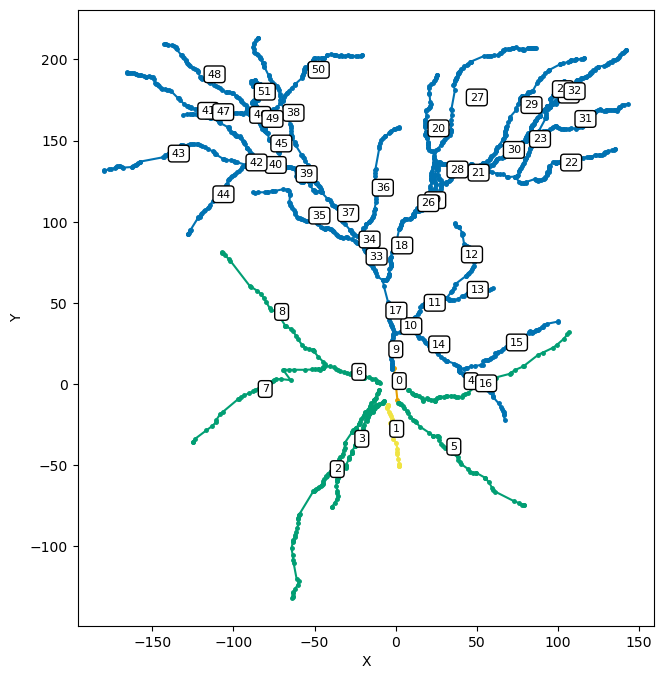

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True,
                    domains=True)

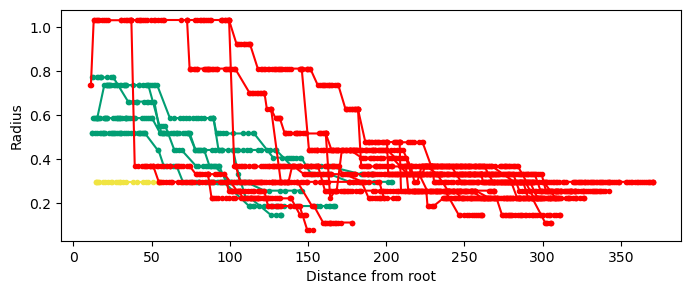

In [16]:
apical_sections = [sec.idx for sec in model.sec_tree if sec.domain == 'apic']
model.sec_tree.plot_radii_distribution(highlight=apical_sections, show_soma=False)

In [17]:
model.domains

{'soma': <Domain(soma, 1 sections)>,
 'apic': <Domain(apic, 43 sections)>,
 'dend': <Domain(dend, 7 sections)>,
 'axon': <Domain(axon, 1 sections)>}

In [18]:
model.groups

{'all': SegmentGroup("all", domains=['soma', 'apic', 'dend', 'axon']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'apical': SegmentGroup("apical", domains=['apic']),
 'dendritic': SegmentGroup("dendritic", domains=['dend']),
 'axonal': SegmentGroup("axonal", domains=['axon'])}

In [19]:
model.domains_to_mechs

{'soma': set(), 'apic': set(), 'dend': set(), 'axon': set()}

## Add Mechanisms

The choice here is:
- load all, add where needed (new, faster!)
- load one, add everywhere (old)

In [20]:
model.path_manager.list_files('default_mod', 'mod')

['vecstim', 'AMPA_NMDA', 'Leak', 'AMPA', 'GABAa', 'NMDA']

In [21]:
model.add_default_mechanisms(recompile=False)

Adding mechanism vecstim to model...
Using precompiled mechanism "vecstim"
Loaded mechanism "vecstim"
Mechanism vecstim loaded to NEURON.

Adding mechanism AMPA_NMDA to model...
Using precompiled mechanism "AMPA_NMDA"
Loaded mechanism "AMPA_NMDA"
Mechanism AMPA_NMDA loaded to NEURON.

Adding mechanism Leak to model...
Using precompiled mechanism "Leak"
Loaded mechanism "Leak"
Mechanism Leak loaded to NEURON.

Adding mechanism AMPA to model...
Using precompiled mechanism "AMPA"
Loaded mechanism "AMPA"
Mechanism AMPA loaded to NEURON.

Adding mechanism GABAa to model...
Using precompiled mechanism "GABAa"
Loaded mechanism "GABAa"
Mechanism GABAa loaded to NEURON.

Adding mechanism NMDA to model...
Using precompiled mechanism "NMDA"
Loaded mechanism "NMDA"
Mechanism NMDA loaded to NEURON.



In [22]:
model.list_mechanisms()

['Na', 'KCa', 'Kv', 'Ka', 'CaHVA', 'Km', 'CaLVA']

In [23]:
for mech in model.list_mechanisms():
    model.add_mechanism(mech, recompile=False)

Replacing SUFFIX Na with SUFFIX Na
Overwritten /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Na.mod
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Na.py
Registering Na from Na in /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python
Importing class Na from module Na.py
Adding mechanism Na to model...
Using precompiled mechanism "Na"
Loaded mechanism "Na"
Mechanism Na loaded to NEURON.

Mechanism Na added to model.
Replacing SUFFIX KCa with SUFFIX KCa
Overwritten /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/KCa.mod
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/KCa.py
Registering KCa from KCa in /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python
Importing class KCa from module KCa.py
Adding mechanism KCa to model...
Using precompiled mechanism "KCa"
Loaded mechanism "KCa"
Mechanism KCa loaded to NEURON.

Mechanism KCa added to mode

In [24]:
model.mechanisms

{'Leak': <Mechnaism(Leak)>,
 'Na': <Mechnaism(Na)>,
 'KCa': <Mechnaism(KCa)>,
 'Kv': <Mechnaism(Kv)>,
 'Ka': <Mechnaism(Ka)>,
 'CaHVA': <Mechnaism(CaHVA)>,
 'Km': <Mechnaism(Km)>,
 'CaLVA': <Mechnaism(CaLVA)>}

In [25]:
model.params

{'cm': {'all': constant({'value': 1})},
 'Ra': {'all': constant({'value': 35.4})}}

In [26]:
model.params_to_mechs

{'cm': 'Independent', 'Ra': 'Independent'}

In [27]:
model.mechs_to_params

{'Independent': ['cm', 'Ra']}

## Segmentation

### Set independent parameters

In [28]:
model.groups

{'all': SegmentGroup("all", domains=['soma', 'apic', 'dend', 'axon']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'apical': SegmentGroup("apical", domains=['apic']),
 'dendritic': SegmentGroup("dendritic", domains=['dend']),
 'axonal': SegmentGroup("axonal", domains=['axon'])}

In [29]:
model.set_param(param_name='cm', 
                group_name='all',
                distr_type = 'constant', value=1)
model.set_param(param_name='cm', 
                group_name='somatic',
                distr_type = 'constant', value=2)

In [30]:
model.set_param(param_name='Ra', 
                group_name='all',
                distr_type = 'constant', value=100)

In [31]:
model.params

{'cm': {'all': constant({'value': 1}), 'somatic': constant({'value': 2})},
 'Ra': {'all': constant({'value': 100})}}

### Create seg tree

In [32]:
d_lambda = 0.1
model.set_segmentation(d_lambda=0.1)

In [33]:
model.d_lambda

0.1

In [34]:
model.seg_tree

Tree [•0, •1, •2, •3, •4, •5, •6, •7, •8, •9, •10, •11, •12, •13, •14, •15, •16, •17, •18, •19, •20, •21, •22, •23, •24, •25, •26, •27, •28, •29, •30, •31, •32, •33, •34, •35, •36, •37, •38, •39, •40, •41, •42, •43, •44, •45, •46, •47, •48, •49, •50, •51, •52, •53, •54, •55, •56, •57, •58, •59, •60, •61, •62, •63, •64, •65, •66, •67, •68, •69, •70, •71, •72, •73, •74, •75, •76, •77, •78, •79, •80, •81, •82, •83, •84, •85, •86, •87, •88, •89, •90, •91, •92, •93, •94, •95, •96, •97, •98, •99, •100, •101, •102, •103, •104, •105, •106, •107, •108, •109, •110, •111, •112, •113, •114, •115, •116, •117, •118, •119, •120, •121, •122, •123, •124, •125, •126, •127, •128, •129, •130, •131, •132, •133, •134, •135, •136, •137, •138, •139, •140, •141, •142, •143, •144, •145, •146, •147, •148, •149, •150, •151, •152, •153, •154, •155, •156, •157, •158, •159, •160, •161, •162, •163, •164, •165, •166, •167, •168, •169, •170, •171, •172, •173, •174, •175, •176, •177, •178, •179, •180, •181, •182, •183, 

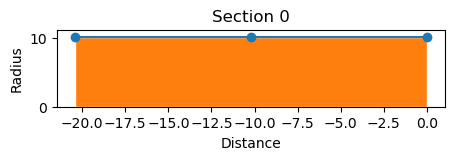

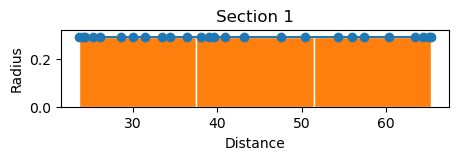

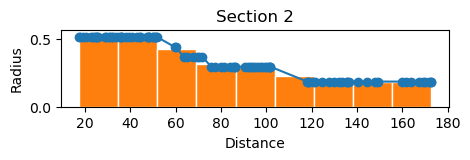

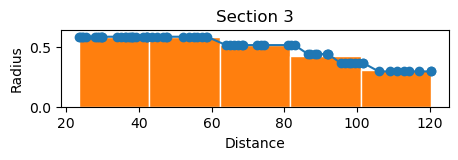

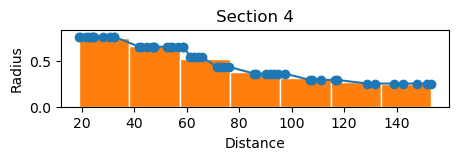

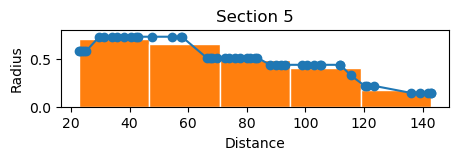

In [35]:
for sec in model.sec_tree.sections:
        fig, ax = plt.subplots(figsize=(5, 1))
        sec.plot_radii(ax)
        ax.set_title(f'Section {sec.idx}')
        if sec.idx >= 5:
            break

In [36]:
len(model.seg_tree)

190

## Distribute mech parameters

In [37]:
all_domains = ['soma', 'dend', 'axon', 'apic']
for domain in all_domains:
    model.insert_mechanism('Leak', domain)
    model.insert_mechanism('Na', domain)
    model.insert_mechanism('Kv', domain)

In [38]:
model.domains_to_mechs

{'soma': {'Kv', 'Leak', 'Na'},
 'apic': {'Kv', 'Leak', 'Na'},
 'dend': {'Kv', 'Leak', 'Na'},
 'axon': {'Kv', 'Leak', 'Na'}}

In [39]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek'],
 'Leak': ['gbar_Leak', 'e_Leak'],
 'Na': ['gbar_Na',
  'Rma_Na',
  'Rmb_Na',
  'v12m_Na',
  'qm_Na',
  'Rhb_Na',
  'Rha_Na',
  'v12ha_Na',
  'v12hb_Na',
  'qh_Na',
  'v12hinf_Na',
  'qhinf_Na'],
 'Kv': ['gbar_Kv', 'v12_Kv', 'q_Kv']}

In [40]:
pprint(model.params, sort_dicts=False, width=1)

{'cm': {'all': constant({'value': 1}),
        'somatic': constant({'value': 2})},
 'Ra': {'all': constant({'value': 100})},
 'gbar_Leak': {'all': constant({'value': 0.0})},
 'e_Leak': {'all': constant({'value': -70})},
 'gbar_Na': {'all': constant({'value': 0.0})},
 'Rma_Na': {'all': constant({'value': 0.182})},
 'Rmb_Na': {'all': constant({'value': 0.14})},
 'v12m_Na': {'all': constant({'value': -30})},
 'qm_Na': {'all': constant({'value': 9.8})},
 'Rhb_Na': {'all': constant({'value': 0.0091})},
 'Rha_Na': {'all': constant({'value': 0.024})},
 'v12ha_Na': {'all': constant({'value': -45})},
 'v12hb_Na': {'all': constant({'value': -70})},
 'qh_Na': {'all': constant({'value': 5})},
 'v12hinf_Na': {'all': constant({'value': -60})},
 'qhinf_Na': {'all': constant({'value': 6.2})},
 'ena': {'all': constant({'value': 50})},
 'gbar_Kv': {'all': constant({'value': 0.0})},
 'v12_Kv': {'all': constant({'value': 25})},
 'q_Kv': {'all': constant({'value': 9})},
 'ek': {'all': constant({'value': -7

In [41]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,cm,somatic,constant,{'value': 2}
2,Independent,Ra,all,constant,{'value': 100}
3,Independent,ena,all,constant,{'value': 50}
4,Independent,ek,all,constant,{'value': -77}
5,Leak,gbar_Leak,all,constant,{'value': 0.0}
6,Leak,e_Leak,all,constant,{'value': -70}
7,Na,gbar_Na,all,constant,{'value': 0.0}
8,Na,Rma_Na,all,constant,{'value': 0.182}
9,Na,Rmb_Na,all,constant,{'value': 0.14}


In [42]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek'],
 'Leak': ['gbar_Leak', 'e_Leak'],
 'Na': ['gbar_Na',
  'Rma_Na',
  'Rmb_Na',
  'v12m_Na',
  'qm_Na',
  'Rhb_Na',
  'Rha_Na',
  'v12ha_Na',
  'v12hb_Na',
  'qh_Na',
  'v12hinf_Na',
  'qhinf_Na'],
 'Kv': ['gbar_Kv', 'v12_Kv', 'q_Kv']}

In [43]:
model.set_param(param_name='gbar_Leak',
                group_name='all',
                distr_type = 'constant', value=0.0001)

In [44]:
for seg in model.seg_tree:
    print(f"Segment {seg.idx} gbar_Leak:{seg.get_param_value('gbar_Leak')}")
    if seg.idx >= 20:
        break

Segment 0 gbar_Leak:0.0001
Segment 1 gbar_Leak:0.0001
Segment 2 gbar_Leak:0.0001
Segment 3 gbar_Leak:0.0001
Segment 4 gbar_Leak:0.0001
Segment 5 gbar_Leak:0.0001
Segment 6 gbar_Leak:0.0001
Segment 7 gbar_Leak:0.0001
Segment 8 gbar_Leak:0.0001
Segment 9 gbar_Leak:0.0001
Segment 10 gbar_Leak:0.0001
Segment 11 gbar_Leak:0.0001
Segment 12 gbar_Leak:0.0001
Segment 13 gbar_Leak:0.0001
Segment 14 gbar_Leak:0.0001
Segment 15 gbar_Leak:0.0001
Segment 16 gbar_Leak:0.0001
Segment 17 gbar_Leak:0.0001
Segment 18 gbar_Leak:0.0001
Segment 19 gbar_Leak:0.0001
Segment 20 gbar_Leak:0.0001


In [45]:
model.set_param(param_name='gbar_Na',
                group_name='all',
                distr_type = 'constant', value=0.03)
model.set_param(param_name='gbar_Na',
                group_name='somatic',
                distr_type = 'constant', value=0.05)

In [46]:
model.set_param(param_name='gbar_Kv',
                group_name='all', 
                distr_type = 'constant', value=0.003)
model.set_param(param_name='gbar_Kv',
                group_name='somatic', 
                distr_type = 'constant', value=0.005)

In [47]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek'],
 'Leak': ['gbar_Leak', 'e_Leak'],
 'Na': ['gbar_Na',
  'Rma_Na',
  'Rmb_Na',
  'v12m_Na',
  'qm_Na',
  'Rhb_Na',
  'Rha_Na',
  'v12ha_Na',
  'v12hb_Na',
  'qh_Na',
  'v12hinf_Na',
  'qhinf_Na'],
 'Kv': ['gbar_Kv', 'v12_Kv', 'q_Kv']}

In [48]:
model.info()

Model: Park_2019
Path to data: /home/roman/Documents/code/DendroTweaks/app/src/data
Simulator: NEURON
Groups: 5
Avaliable mechanisms: 8
Inserted mechanisms: 3
IClamps: 0



In [49]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,cm,somatic,constant,{'value': 2}
2,Independent,Ra,all,constant,{'value': 100}
3,Independent,ena,all,constant,{'value': 50}
4,Independent,ek,all,constant,{'value': -77}
5,Leak,gbar_Leak,all,constant,{'value': 0.0001}
6,Leak,e_Leak,all,constant,{'value': -70}
7,Na,gbar_Na,all,constant,{'value': 0.03}
8,Na,gbar_Na,somatic,constant,{'value': 0.05}
9,Na,Rma_Na,all,constant,{'value': 0.182}


In [50]:
# model.add_group('axon', lambda sec: sec.domain == 'axon')

## Problem with diams

In [51]:
# Section diam in NEURON
sec._ref.diam

0.9730643396402275

In [52]:
# diam of each segment in NEURON
seg_diams = np.array([seg.diam for seg in sec._ref])
print(f'{seg_diams.size} segments with diam {seg_diams.mean()}')

5 segments with diam 0.9746563570269734


In [53]:
# diam of each pt3d in neuron
pts3d_diams = np.array([sec._ref.diam3d(i) for i in range(sec._ref.n3d())])
print(f'{pts3d_diams.size} pt3d with diam {pts3d_diams.mean()}')

49 pt3d with diam 0.9991836675575801


In [54]:
# diam of each pt3d in custom section
swc_diams = np.array([2*pt.r for pt in sec.points])
print(f'{swc_diams.size} pt3d with diam {swc_diams.mean()}')

49 pt3d with diam 0.9991836734693877


In [55]:
for i, (swc_diam, neuron_diam) in enumerate(zip(swc_diams, pts3d_diams)):
    print(f'{swc_diam} {neuron_diam}')
    if i > 10 : break

1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295


In [56]:
# from core.utils import calculate_lambda_f
# from neuron import h
# h.load_file('stdrun.hoc')
# f = 100
# for sec in model.sec_tree.sections:
#     neuron_sec = sec._ref
#     # diam = neuron_sec.diam
#     diam = np.array([seg.diam for seg in sec._ref]).mean()
#     lambda_f = calculate_lambda_f(diam, neuron_sec.Ra, neuron_sec.cm)
#     lambda_f_neuron = h.lambda_f(f, sec=neuron_sec)
#     nseg = int((neuron_sec.L / (0.1 * lambda_f) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f:.5f} um')
#     nseg_neuron = int((neuron_sec.L / (0.1 * lambda_f_neuron) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f_neuron:.5f} um')
#     # print(f'Neuron lambda_f = {lambda_f_neuron:.5f} um, calculated lambda_f = {lambda_f:.5f} um')
#     print(f'Neuron nseg = {nseg_neuron}, calculated nseg = {nseg}')

# Problem with nseg

Text(0.5, 1.0, 'Correspondence between nseg and length')

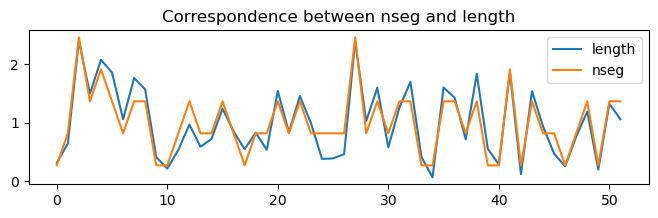

In [57]:
fig, ax = plt.subplots(figsize=(8, 2))
sec_ids = np.array([sec.idx for sec in model.sec_tree.sections])
sec_nseg = np.array([sec._ref.nseg for sec in model.sec_tree.sections])
sec_diams = np.array([np.array([seg.diam for seg in sec._ref]).mean() for sec in model.sec_tree.sections])
# sec_cm = np.array([sec._ref.cm for sec in model.sec_tree.sections])
# sec_Ra = np.array([sec._ref.Ra for sec in model.sec_tree.sections])
sec_lenghts = np.array([sec._ref.L for sec in model.sec_tree.sections])
# draw a vertical line between nseg and length datapoints for each section

sec_nseg = sec_nseg / sec_nseg.mean()
sec_lenghts = sec_lenghts / sec_lenghts.mean()

ys = sec_nseg - sec_lenghts

# ax.vlines(sec_ids, sec_nseg, sec_lenghts, color='k', label='nseg')
ax.plot(sec_ids, sec_lenghts, '-', label='length')
ax.plot(sec_ids, sec_nseg, '-', label='nseg')
# ax.stem(sec_ids, ys, use_line_collection=True)
ax.legend()
ax.set_title('Correspondence between nseg and length')

In [58]:
for sec in model.sec_tree.sections:
    print(f'Section {sec.idx} has {sec._ref.nseg} segments')

Section 0 has 1 segments
Section 1 has 3 segments
Section 2 has 9 segments
Section 3 has 5 segments
Section 4 has 7 segments
Section 5 has 5 segments
Section 6 has 3 segments
Section 7 has 5 segments
Section 8 has 5 segments
Section 9 has 1 segments
Section 10 has 1 segments
Section 11 has 3 segments
Section 12 has 5 segments
Section 13 has 3 segments
Section 14 has 3 segments
Section 15 has 5 segments
Section 16 has 3 segments
Section 17 has 1 segments
Section 18 has 3 segments
Section 19 has 3 segments
Section 20 has 5 segments
Section 21 has 3 segments
Section 22 has 5 segments
Section 23 has 3 segments
Section 24 has 3 segments
Section 25 has 3 segments
Section 26 has 3 segments
Section 27 has 9 segments
Section 28 has 3 segments
Section 29 has 5 segments
Section 30 has 3 segments
Section 31 has 5 segments
Section 32 has 5 segments
Section 33 has 1 segments
Section 34 has 1 segments
Section 35 has 5 segments
Section 36 has 5 segments
Section 37 has 3 segments
Section 38 has 5 segme

# Mechanisms kinetics

Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 37°C


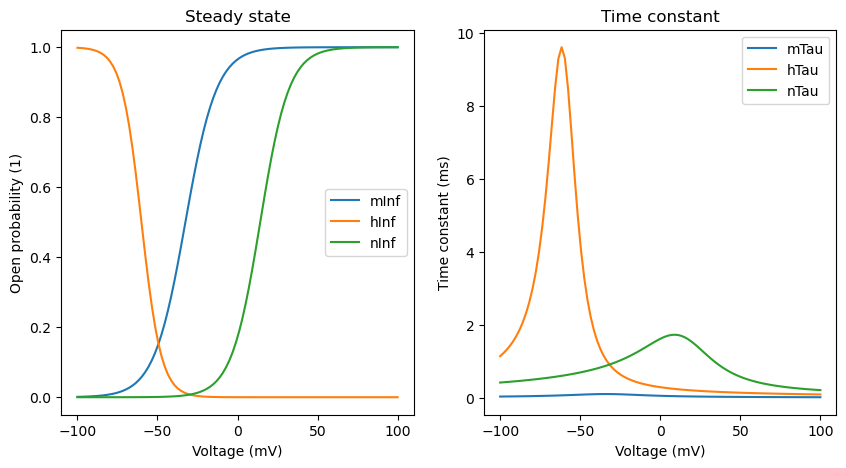

In [59]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
model.mechanisms['Na'].plot_kinetics(ax)
model.mechanisms['Kv'].plot_kinetics(ax)

# Simulate

In [60]:
model.set_param('e_Leak', value=-79)
model.set_param('ena', value=60)
model.set_param('ek', value=-80)
model.set_param('temperature', value=37)
model.set_param('v_init', value=-79)

In [61]:
soma = model.sec_tree.soma
dend = model.sec_tree.domains['dend'].sections[0]

In [62]:
model.add_recording(soma, loc=0.5)
model.add_recording(dend, loc=0.5)

In [63]:
model.simulator.recordings

{•0: Vector[0], •8: Vector[1]}

In [64]:
model.remove_all_iclamps()
model.add_iclamp(soma, loc=0.5, amp=0.15, delay=100, dur=100)

IClamp added to sec ••0 at loc 0.5.


In [65]:
model.iclamps

{•0: <IClamp(sec[0](0.50))>}

In [66]:
model.simulator.run(duration=300)

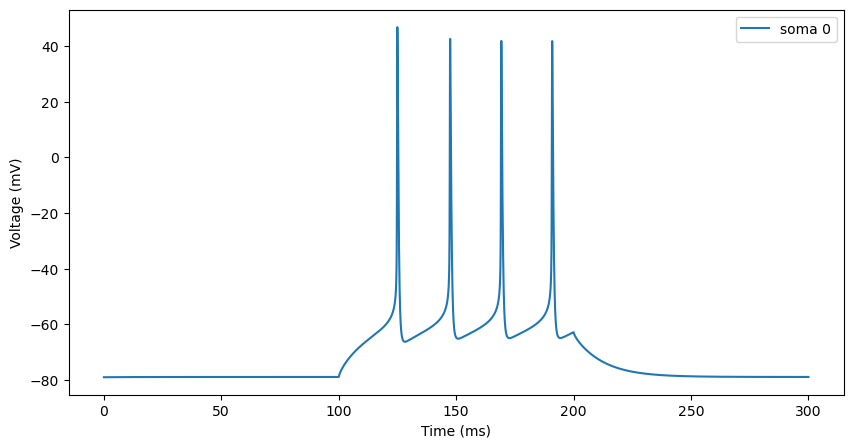

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
model.simulator.plot_voltage(ax=ax, segments=[0])

In [66]:
t, v, _ = model.simulator.run(duration=300)

In [84]:
model.simulator.recordings

{•0: Vector[0], •8: Vector[1]}

In [76]:
model.simulator.v

(-100.0, 60.0)

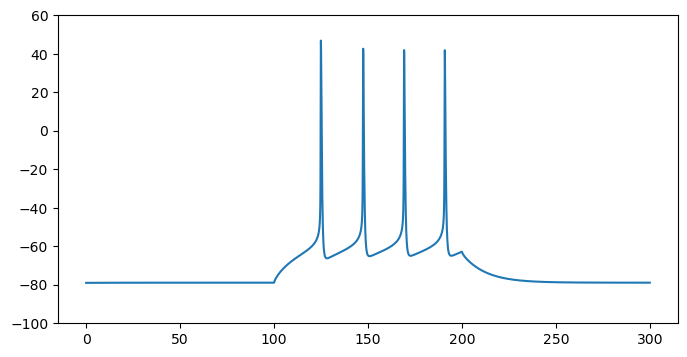

In [83]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t[0], v[0])
ax.set_ylim(-100, 60)

In [84]:
model._groups

[SegmentGroup("all", domains=['dend', 'soma', 'apic', 'axon']),
 SegmentGroup("dendritic", domains=['dend']),
 SegmentGroup("somatic", domains=['soma']),
 SegmentGroup("apical", domains=['apic']),
 SegmentGroup("axonal", domains=['axon'])]

In [85]:
pprint(model.to_dict(), sort_dicts=False, width=1)

{'metadata': {'name': 'Park_2019'},
 'd_lambda': 0.1,
 'domains': {'dend': ['Leak',
                      'Na',
                      'Kv'],
             'soma': ['Leak',
                      'Na',
                      'Kv'],
             'apic': ['Leak',
                      'Na',
                      'Kv'],
             'axon': ['Leak',
                      'Na',
                      'Kv']},
 'groups': [{'name': 'all',
             'domains': ['dend',
                         'soma',
                         'apic',
                         'axon']},
            {'name': 'dendritic',
             'domains': ['dend']},
            {'name': 'somatic',
             'domains': ['soma']},
            {'name': 'apical',
             'domains': ['apic']},
            {'name': 'axonal',
             'domains': ['axon']}],
 'params': {'cm': {'all': {'function': 'constant',
                           'parameters': {'value': 1}},
                   'somatic': {'function': 'constant',
    

In [86]:
model.stimuli_to_dict()

{'metadata': {'name': 'Park_2019'},
 'simulation': {'temperature': 37, 'v_init': -79, 'dt': 0.025},
 'stimuli': {'iclamps': [{'name': 'iclamp_0',
    'amp': 0.15,
    'delay': 100.0,
    'dur': 100.0}],
  'populations': {'AMPA': [], 'NMDA': [], 'AMPA_NMDA': [], 'GABAa': []}}}

In [87]:
model._stimuli_to_csv()

{'type': ['recording'], 'idx': [0], 'sec_idx': [0], 'loc': [0.5], 'n_per_seg': [1]}


,type,idx,sec_idx,loc,n_per_seg
0,recording,0.0,0,0.5,1.0
1,iclamp,0.0,0,0.5,1.0


In [89]:
model.export_membrane(version='test', indent=4)

# Synapses

In [90]:
model.path_manager.print_directory_tree('default_mod')

├── AMPA
│   ├── AMPA.mod
│   └── x86_64
├── AMPA.mod
├── AMPA_NMDA
│   ├── AMPA_NMDA.mod
│   └── x86_64
├── AMPA_NMDA.mod
├── GABAa
│   ├── GABAa.mod
│   └── x86_64
├── GABAa.mod
├── Leak
│   ├── Leak.mod
│   └── x86_64
├── Leak.mod
├── NMDA
│   ├── NMDA.mod
│   └── x86_64
├── NMDA.mod
├── vecstim
│   ├── vecstim.mod
│   └── x86_64
└── vecstim.mod


In [91]:
model.add_population(
    segments=[seg for sec in model.get_sections(lambda sec: sec.domain == 'dend') for seg in sec.segments], 
    N=10, 
    syn_type='AMPA'
)

In [92]:
pop = model.populations['AMPA']['AMPA_0']

Text(0, 0.5, 'Number of synapses')

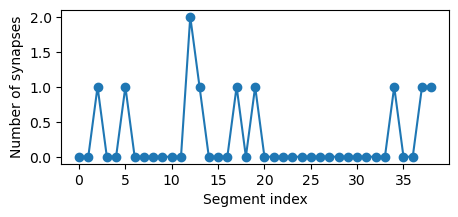

In [93]:
fig, ax = plt.subplots(figsize=(5, 2))
# histogram of synapse N per secton (pop.n_per_sec)
plt.plot([v for k,v in pop.n_per_seg.items()], 'o-');
plt.xlabel('Segment index')
plt.ylabel('Number of synapses')

In [94]:
pop.update_input_params({'rate':100, 'weight':1, 'noise':1})

In [95]:
pprint(model.to_dict(), sort_dicts=False, width=1)

{'metadata': {'name': 'Park_2019'},
 'd_lambda': 0.1,
 'domains': {'dend': ['Leak',
                      'Na',
                      'Kv'],
             'soma': ['Leak',
                      'Na',
                      'Kv'],
             'apic': ['Leak',
                      'Na',
                      'Kv'],
             'axon': ['Leak',
                      'Na',
                      'Kv']},
 'groups': [{'name': 'all',
             'domains': ['dend',
                         'soma',
                         'apic',
                         'axon']},
            {'name': 'dendritic',
             'domains': ['dend']},
            {'name': 'somatic',
             'domains': ['soma']},
            {'name': 'apical',
             'domains': ['apic']},
            {'name': 'axonal',
             'domains': ['axon']}],
 'params': {'cm': {'all': {'function': 'constant',
                           'parameters': {'value': 1}},
                   'somatic': {'function': 'constant',
    

In [97]:
model.export_stimuli(version='test', indent=4)

{'type': ['recording'], 'idx': [0], 'sec_idx': [0], 'loc': [0.5], 'n_per_seg': [1]}
